In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import re

%matplotlib inline

# Import Scikit-learn helper functions
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Import Scikit-learn models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Import Scikit-learn metric functions
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Load the dataset
With this set, we first need to load our CSV data.

In [5]:
# Load the training data
print("- Loading CSV Data -")
url_df = pd.read_csv('../data/Malicious URLs.csv')

test_url = url_df['URLs'][4]

print("\n### CSV Data Loaded ###\n")

- Loading CSV Data -

### CSV Data Loaded ###



In [6]:
# Let's see what our training data looks like
print(url_df)

                                                     URLs Class
0                         freebase.com/view/en/bob_sirois  good
1                          en.wikipedia.org/wiki/Joie_Lee  good
2                pipl.com/directory/people/Rejean/Beaudin  good
3       flickr.com/photos/teneyck/sets/72157610336209297/  good
4       ussoccer.com/News/Federation-Services/2009/06/...  good
...                                                   ...   ...
420459  ourorigins.org/genealogielistfirstname.aspx?an...  good
420460    simira.co.id/cifk/live.com/Account_Verified.htm   bad
420461  kstatesports.com/sports/w-baskbl/spec-rel/ksu-...  good
420462  vh1.com/video/living-colour/9128/cult-of-perso...  good
420463     absoluteastronomy.com/topics/SummerSlam_(1990)  good

[420464 rows x 2 columns]


In [7]:
# Perform Train/Test split
test_percentage = .2

train_df, test_df = train_test_split(url_df, test_size=test_percentage, random_state=42)

labels = train_df['Class']
test_labels = test_df['Class']

print("\n### Split Complete ###\n")


### Split Complete ###



- Counting Splits -
Training Samples: 336371
Testing Samples: 84093


C:\Users\Dell\AppData\Local\Temp\ipykernel_12772\4123009843.py:7: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_train_classes = pd.value_counts(train_df['Class'])


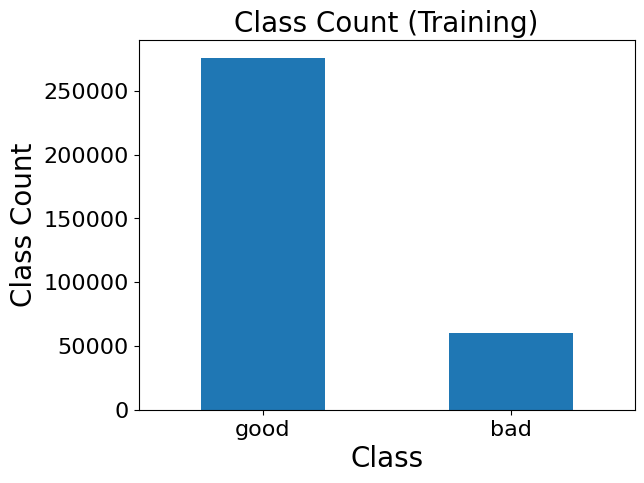

C:\Users\Dell\AppData\Local\Temp\ipykernel_12772\4123009843.py:16: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_test_classes = pd.value_counts(test_df['Class'])


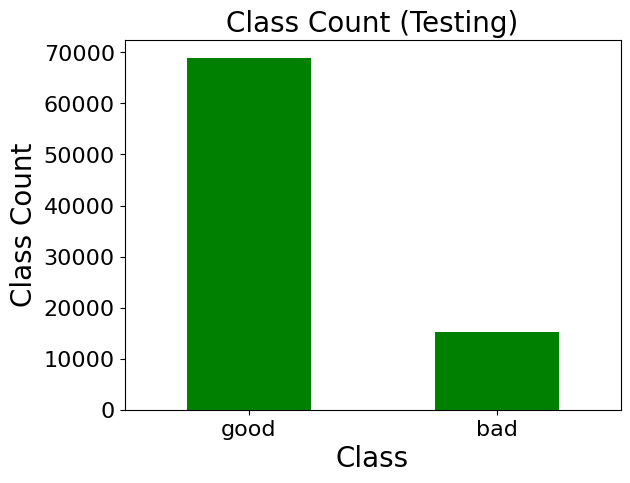

In [8]:
# Print counts of each class
print("- Counting Splits -")
print("Training Samples:", len(train_df))
print("Testing Samples:", len(test_df))

# Graph counts of each class, for both training and testing
count_train_classes = pd.value_counts(train_df['Class'])
count_train_classes.plot(kind='bar', fontsize=16)
plt.title("Class Count (Training)", fontsize=20)
plt.xticks(rotation='horizontal')
plt.xlabel("Class", fontsize=20)
plt.ylabel("Class Count", fontsize=20)

plt.show()

count_test_classes = pd.value_counts(test_df['Class'])
count_test_classes.plot(kind='bar', fontsize=16, colormap='ocean')
plt.title("Class Count (Testing)", fontsize=20)
plt.xticks(rotation='horizontal')
plt.xlabel("Class", fontsize=20)
plt.ylabel("Class Count", fontsize=20)

plt.show()

#** Tokenization**
Create our tokenizer by splitting URLs into their domains, subdomains, directories, files, and extensions.

In [9]:
# Define tokenizer
#   The purpose of a tokenizer is to separate the features from the raw data


def tokenizer(url):
  """Separates feature words from the raw data
  Keyword arguments:
    url ---- The full URL

  :Returns -- The tokenized words; returned as a list
  """

  # Split by slash (/) and dash (-)
  tokens = re.split('[/-]', url)

  for i in tokens:
    # Include the splits extensions and subdomains
    if i.find(".") >= 0:
      dot_split = i.split('.')

      # Remove .com and www. since they're too common
      if "com" in dot_split:
        dot_split.remove("com")
      if "www" in dot_split:
        dot_split.remove("www")

      tokens += dot_split

  return tokens

print("\n### Tokenizer defined ###\n")


### Tokenizer defined ###



# Task 1 - Tokenize a URL
1. Print the full URL, test_url
3. Print the results of tokenizer(test_url)

In [10]:
# Let's see how our tokenizer changes our URLs

print("\n- Full URL -\n")
print(test_url)

print("\n- Tokenized Output -\n")
tokenized_url = tokenizer(test_url)
print(tokenized_url)


- Full URL -

ussoccer.com/News/Federation-Services/2009/06/University-Of-Miami-President-Donna-E-Shalala-Joins-Team-To-Bring-FIFA-World-Cup-To-United-States-In.aspx

- Tokenized Output -

['ussoccer.com', 'News', 'Federation', 'Services', '2009', '06', 'University', 'Of', 'Miami', 'President', 'Donna', 'E', 'Shalala', 'Joins', 'Team', 'To', 'Bring', 'FIFA', 'World', 'Cup', 'To', 'United', 'States', 'In.aspx', 'ussoccer', 'In', 'aspx']


# Vectorize the Data
Now that the training data has been loaded, we'll train the vectorizers to turn our features into numbers.

## Task 2 - Train the vectorizers
1. Create the count vectorizer **cVec** using the **CountVectorizer** function
2. Configure *cVec* to use the *tokenizer* function from earlier
3. Perform **fit_transform** on *cVec* to train the vectorizer with the *training URLs*\
a. Save the result as **count_X**


4. Create the TF-IDF vectorizer **tVec** using the **TfidfVectorizer** function
5. Configure *tVec* to use the *tokenizer* function from earlier
6. Perform **fit_transform** on *tVec* to train the vectorizer with the *training URLs*\
a. Save the result as **tfidf_X**

In [11]:
# Vectorizer the training inputs -- Takes about 30 seconds to complete
#   There are two types of vectors:
#     1. Count vectorizer
#     2. Term Frequency-Inverse Document Frequency (TF-IDF)

print("- Training Count Vectorizer -")
cVec = CountVectorizer(tokenizer=tokenizer)
count_X = cVec.fit_transform(train_df['URLs'])

print("- Training TF-IDF Vectorizer -")
tVec = TfidfVectorizer(tokenizer=tokenizer)
tfidf_X = tVec.fit_transform(train_df['URLs'])

print("\n### Vectorizing Complete ###\n")

- Training Count Vectorizer -


c:\Users\Dell\Desktop\malicious-url-detection\venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


- Training TF-IDF Vectorizer -

### Vectorizing Complete ###



# Task2a: Count the test URL tokens
Print the count of each token from test_url

In [12]:
# Manually perform term count on test_url

for token in list(dict.fromkeys(tokenized_url)):
  print("{} - {}".format(tokenized_url.count(token), token))


1 - ussoccer.com
1 - News
1 - Federation
1 - Services
1 - 2009
1 - 06
1 - University
1 - Of
1 - Miami
1 - President
1 - Donna
1 - E
1 - Shalala
1 - Joins
1 - Team
2 - To
1 - Bring
1 - FIFA
1 - World
1 - Cup
1 - United
1 - States
1 - In.aspx
1 - ussoccer
1 - In
1 - aspx


# Task 2b - View the test URL vectorizers
Create a new CountVectorizer and TfidfVectorizer for demonstration
Train the new vectorizers on test_url using fit_transform
Print the results of each transform

In [13]:
print("\n- Count Vectorizer (Test URL) -\n")
exvec = CountVectorizer(tokenizer=tokenizer)
exx = exvec.fit_transform([test_url])
print(exx)

# (Keep the following lines)
print()
print("=" * 50)
print()


print("\n- TFIDF Vectorizer (Test URL) -\n")
exvec2 = TfidfVectorizer(tokenizer=tokenizer)
exx2 = exvec2.fit_transform([test_url])
print(exx2)


- Count Vectorizer (Test URL) -

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 26 stored elements and shape (1, 26)>
  Coords	Values
  (0, 24)	1
  (0, 13)	1
  (0, 7)	1
  (0, 16)	1
  (0, 1)	1
  (0, 0)	1
  (0, 22)	1
  (0, 14)	1
  (0, 12)	1
  (0, 15)	1
  (0, 5)	1
  (0, 6)	1
  (0, 17)	1
  (0, 11)	1
  (0, 19)	1
  (0, 20)	2
  (0, 3)	1
  (0, 8)	1
  (0, 25)	1
  (0, 4)	1
  (0, 21)	1
  (0, 18)	1
  (0, 10)	1
  (0, 23)	1
  (0, 9)	1
  (0, 2)	1



- TFIDF Vectorizer (Test URL) -

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 26 stored elements and shape (1, 26)>
  Coords	Values
  (0, 24)	0.18569533817705186
  (0, 13)	0.18569533817705186
  (0, 7)	0.18569533817705186
  (0, 16)	0.18569533817705186
  (0, 1)	0.18569533817705186
  (0, 0)	0.18569533817705186
  (0, 22)	0.18569533817705186
  (0, 14)	0.18569533817705186
  (0, 12)	0.18569533817705186
  (0, 15)	0.18569533817705186
  (0, 5)	0.18569533817705186
  (0, 6)	0.18569533817705186
  (0, 17)	0.18569533817705186
  (0, 11)	0.1

# Test and Evaluate the Models
OK, we have our training data loaded and our testing data loaded. Now it's time to train and evaluate our models.

But first, we're going to define a helper function to display our evaluation reports.

# Task 3 - Vectorize the testing data
1. Use cVec to transform test_df['URLs']
a.`Save the result as test_count_X`

2. Use tVec to transform test_df['URLs']
a. `Save the result as test_tfidf_X`

In [14]:
# Vectorize the testing inputs
#   Use 'transform' instead of 'fit_transform' because we've already trained our vectorizers

print("- Count Vectorizer -")
test_count_X = cVec.transform(test_df['URLs'])

print("- TFIDF Vectorizer -")
test_tfidf_X = tVec.transform(test_df['URLs'])


print("\n### Vectorizing Complete ###\n")

- Count Vectorizer -
- TFIDF Vectorizer -

### Vectorizing Complete ###



In [15]:
# Define report generator

def generate_report(cmatrix, score, creport):
  """Generates and displays graphical reports
  Keyword arguments:
    cmatrix - Confusion matrix generated by the model
    score --- Score generated by the model
    creport - Classification Report generated by the model

  :Returns -- N/A
  """

  # Transform cmatrix because Sklearn has pred as columns and actual as rows.
  cmatrix = cmatrix.T

  # Generate confusion matrix heatmap
  plt.figure(figsize=(5,5))
  sns.heatmap(cmatrix,
              annot=True,
              fmt="d",
              linewidths=.5,
              square = True,
              cmap = 'Blues',
              annot_kws={"size": 16},
              xticklabels=['bad', 'good'],
              yticklabels=['bad', 'good'])

  plt.xticks(rotation='horizontal', fontsize=16)
  plt.yticks(rotation='horizontal', fontsize=16)
  plt.xlabel('Actual Label', size=20);
  plt.ylabel('Predicted Label', size=20);

  title = 'Accuracy Score: {0:.4f}'.format(score)
  plt.title(title, size = 20);

  # Display classification report and confusion matrix
  print(creport)
  plt.show()


print("\n### Report Generator Defined ###\n")


### Report Generator Defined ###



# Task 4a - Train and evaluate the MNB-TFIDF model
1. Create **mnb_tfidf** as a **MultinomialNB()** constructor
2. Use **fit** to train *mnb_tfidf* on the training data (*tfidf_X*) and training labels (*labels*)
3. Evaluate the model with the testing data (*test_tfidf_X*) and testing labels (*test_labels*):\
a. Use the **score** function in *mnb_tfidf* to calculate model accuracy; save the results as **score_mnb_tfidf**\
b. Use the **predict** function in *mnb_tfidf* to generate model predictions; save the results as **predictions_mnb_tfidf**\
c. Generate the confusion matrix with **confusion_matrix**, using the predictons and labels; save the results as **cmatrix_mnb_tfidf**\
d. Generate the classification report with **classification_report**, using the predictions and labels; save the results as **creport_mnb_tfidf**


### Model Built ###

              precision    recall  f1-score   support

         bad       0.98      0.91      0.94     15136
        good       0.98      1.00      0.99     68957

    accuracy                           0.98     84093
   macro avg       0.98      0.95      0.97     84093
weighted avg       0.98      0.98      0.98     84093



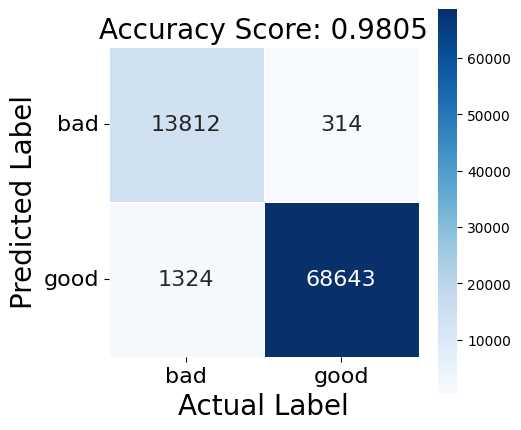

In [16]:
# Multinomial Naive Bayesian with TF-IDF

# Train the model
mnb_tfidf = MultinomialNB(alpha = .1)
mnb_tfidf.fit(tfidf_X, labels)


# Test the mode (score, predictions, confusion matrix, classification report)
score_mnb_tfidf = mnb_tfidf.score(test_tfidf_X, test_labels)
predictions_mnb_tfidf = mnb_tfidf.predict(test_tfidf_X)
cmatrix_mnb_tfidf = confusion_matrix(test_labels, predictions_mnb_tfidf)
creport_mnb_tfidf = classification_report(test_labels, predictions_mnb_tfidf)


# (Keep the following lines)
print("\n### Model Built ###\n")
generate_report(cmatrix_mnb_tfidf, score_mnb_tfidf, creport_mnb_tfidf)

## Task 4b - Train and evaluate the MNB-Count model
1. Create **mnb_count** as a **MultinomialNB()** constructor
2. Use **fit** to train *mnb_count* on the training data (*count_X*) and training labels (*labels*)
3. Evaluate the model with the testing data (*test_count_X*) and testing labels (*test_labels*):\
a. Use the **score** function in *mnb_count* to calculate model accuracy; save the results as **score_mnb_count**\
b. Use the **predict** function in *mnb_count* to generate model predictions; save the results as **predictions_mnb_count**\
c. Generate the confusion matrix with **confusion_matrix**, using the predictons and labels; save the results as **cmatrix_mnb_count**\
d. Generate the classification report with **classification_report**, using the predictions and labels; save the results as **creport_mnb_count**


### Model Built ###

              precision    recall  f1-score   support

         bad       0.96      0.92      0.94     15136
        good       0.98      0.99      0.99     68957

    accuracy                           0.98     84093
   macro avg       0.97      0.96      0.96     84093
weighted avg       0.98      0.98      0.98     84093



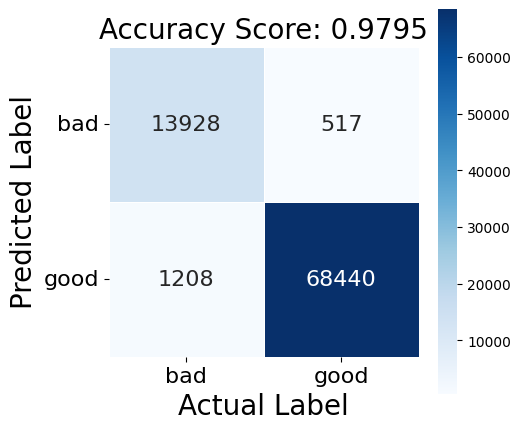

In [17]:
# Multinomial Naive Bayesian with Count Vectorizer

# Train the model
mnb_count = MultinomialNB(alpha = .1)
mnb_count.fit(count_X, labels)


# Test the mode (score, predictions, confusion matrix, classification report)
score_mnb_count = mnb_count.score(test_count_X, test_labels)
predictions_mnb_count = mnb_count.predict(test_count_X)
cmatrix_mnb_count = confusion_matrix(test_labels, predictions_mnb_count)
creport_mnb_count = classification_report(test_labels, predictions_mnb_count)


# (Keep the following lines)
print("\n### Model Built ###\n")
generate_report(cmatrix_mnb_count, score_mnb_count, creport_mnb_count)

## Task 4c - Train and evaluate the LGS-TFIDF model
1. Create **lgs_tfidf** as a **LogisticRegression()** constructor, using the **lbfgs** *solver*
2. Use **fit** to train *lgs_tfidf* on the training data (*tfidf_X*) and training labels (*labels*)
3. Evaluate the model with the testing data (*test_tfidf_X*) and testing labels (*test_labels*):\
a. Use the **score** function in *lgs_tfidf* to calculate model accuracy; save the results as **score_lgs_tfidf**\
b. Use the **predict** function in *lgs_tfidf* to generate model predictions; save the results as **predictions_lgs_tfidf**\
c. Generate the confusion matrix with **confusion_matrix**, using the predictons and labels; save the results as **cmatrix_lgs_tfidf**\
d. Generate the classification report with **classification_report**, using the predictions and labels; save the results as **creport_lgs_tfidf**


### Model Built ###

              precision    recall  f1-score   support

         bad       0.96      0.82      0.89     15136
        good       0.96      0.99      0.98     68957

    accuracy                           0.96     84093
   macro avg       0.96      0.91      0.93     84093
weighted avg       0.96      0.96      0.96     84093



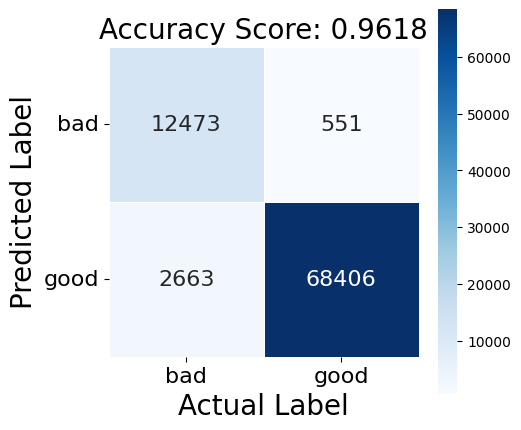

In [18]:
# Logistic Regression with TF-IDF

# Train the model
lgs_tfidf = LogisticRegression(solver='lbfgs')
lgs_tfidf.fit(tfidf_X, labels)


# Test the mode (score, predictions, confusion matrix, classification report)
score_lgs_tfidf = lgs_tfidf.score(test_tfidf_X, test_labels)
predictions_lgs_tfidf = lgs_tfidf.predict(test_tfidf_X)
creport_lgs_tfidf = classification_report(test_labels, predictions_lgs_tfidf)
cmatrix_lgs_tfidf = confusion_matrix(test_labels, predictions_lgs_tfidf)


# (Keep the following lines)
print("\n### Model Built ###\n")
generate_report(cmatrix_lgs_tfidf, score_lgs_tfidf, creport_lgs_tfidf)

## Task 4d - Train and evaluate the LGS-Count model
1. Create **lgs_count** as a **LogisticRegression()** constructor, using the **lbfgs** *solver*
2. Use **fit** to train *lgs_count* on the training data (*count_X*) and training labels (*labels*)
3. Evaluate the model with the testing data (*test_count_X*) and testing labels (*test_labels*):\
a. Use the **score** function in *lgs_count* to calculate model accuracy; save the results as **score_lgs_count**\
b. Use the **predict** function in *lgs_count* to generate model predictions; save the results as **predictions_lgs_count**\
c. Generate the confusion matrix with **confusion_matrix**, using the predictons and labels; save the results as **cmatrix_lgs_count**\
d. Generate the classification report with **classification_report**, using the predictions and labels; save the results as **creport_lgs_count**


### Model Built ###

              precision    recall  f1-score   support

         bad       0.97      0.87      0.92     15136
        good       0.97      0.99      0.98     68957

    accuracy                           0.97     84093
   macro avg       0.97      0.93      0.95     84093
weighted avg       0.97      0.97      0.97     84093



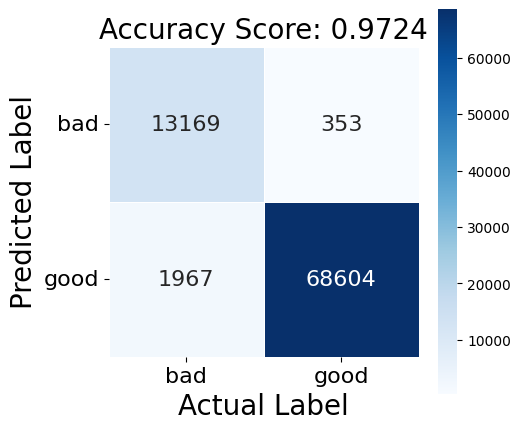

In [19]:
# Logistic Regression with Count Vectorizer

# Train the model
lgs_count = LogisticRegression(solver='lbfgs')
lgs_count.fit(count_X, labels)




# Test the mode (score, predictions, confusion matrix, classification report)
score_lgs_count = lgs_count.score(test_count_X, test_labels)
predictions_lgs_count = lgs_count.predict(test_count_X)
cmatrix_lgs_count = confusion_matrix(test_labels, predictions_lgs_count)
creport_lgs_count = classification_report(test_labels, predictions_lgs_count)




# (Keep the following lines)
print("\n### Model Built ###\n")
generate_report(cmatrix_lgs_count, score_lgs_count, creport_lgs_count)

In [20]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

def predict_urls(mnb_count, count_vectorizer, urls, show_probabilities=True):
    """
    Predict the classification of URLs using a trained MultinomialNB model

    Parameters:
    mnb_count: trained MultinomialNB model
    count_vectorizer: fitted CountVectorizer
    urls: list of URLs to predict
    show_probabilities: whether to show prediction probabilities

    Returns:
    DataFrame with URLs and their predictions
    """
    # Transform the URLs using the same vectorizer
    X_test = count_vectorizer.transform(urls)

    # Get predictions
    predictions = mnb_count.predict(X_test)

    # Get prediction probabilities if requested
    if show_probabilities:
        probabilities = mnb_count.predict_proba(X_test)

        # Create results DataFrame
        results = pd.DataFrame({
            'URL': urls,
            'Predicted_Class': predictions,
            'Confidence': np.max(probabilities, axis=1)
        })
    else:
        results = pd.DataFrame({
            'URL': urls,
            'Predicted_Class': predictions
        })

    return results

# Example usage:
# Assuming you have your dataset in a DataFrame called 'df'
# urls_to_test = df['url'].head(10).tolist()
# results = predict_urls(mnb_count, count_vectorizer, urls_to_test)
# print(results)

In [21]:
url_df.tail(10)

,URLs,Class
420454,letthemreadbooks.blogspot.com/,good
420455,uptownmessenger.com/2011/05/irish-channel-corn...,good
420456,mcdermottcue.com/player_dave_dupuis.php,good
420457,windsongradiology.com/about/doctors.php,good
420458,en.wikipedia.org/wiki/%C3%89quiterre,good
420459,ourorigins.org/genealogielistfirstname.aspx?an...,good
420460,simira.co.id/cifk/live.com/Account_Verified.htm,bad
420461,kstatesports.com/sports/w-baskbl/spec-rel/ksu-...,good
420462,vh1.com/video/living-colour/9128/cult-of-perso...,good
420463,absoluteastronomy.com/topics/SummerSlam_(1990),good


In [22]:
# url_df
first_10_urls = url_df['URLs'].tail(20)

# Step 3: Preprocess the URLs (if any preprocessing was done during training)
# For example, if you used a specific preprocessing function, apply it here
# first_10_urls = preprocess_urls(first_10_urls)

# Step 4: Vectorize the URLs
_x_testcounts = cVec.transform(first_10_urls)

# Step 5: Make predictions
predictions = mnb_count.predict(_x_testcounts)

# Step 6: Display the results
for url, prediction in zip(first_10_urls, predictions):
    print(f"URL: {url} - Predicted Class: {prediction}")


URL: en.wikipedia.org/wiki/Warren_Powers_(American_football) - Predicted Class: good
URL: rosecreekbuilders.com/ - Predicted Class: good
URL: foveawaac.net/yjmaazj - Predicted Class: bad
URL: en.wikipedia.org/wiki/Julian_Osgood_Field - Predicted Class: good
URL: gosgmart.com/db_conf/ieccs/directiondereboursement/redirection.php - Predicted Class: bad
URL: test.sharmx.com.ua/sdideep/87hg8n54 - Predicted Class: bad
URL: dns.consistwa.com/ - Predicted Class: bad
URL: passagesmb.com/30days_details.cfm?cID=1&endate=08/02/11 - Predicted Class: good
URL: rctrading.us/vevex/doc/dxx/8f56eaf5c20880520e4fba303b442281 - Predicted Class: bad
URL: amazon.com/phrase/Howie-Morenz - Predicted Class: good
URL: letthemreadbooks.blogspot.com/ - Predicted Class: good
URL: uptownmessenger.com/2011/05/irish-channel-corner-store-ecole-bilingue-childcare-center-receive-planning-commission-approval/ - Predicted Class: good
URL: mcdermottcue.com/player_dave_dupuis.php - Predicted Class: good
URL: windsongradiolo

In [23]:
def predict_single_url(url, mnb_count, cVec, show_probability=True):
    """
    Predict the classification of a single URL using a trained MultinomialNB model

    Parameters:
    url: string, the URL to classify
    mnb_count: trained MultinomialNB model
    cVec: fitted CountVectorizer
    show_probability: boolean, whether to show prediction probability

    Returns:
    tuple of (prediction, probability) if show_probability=True
    prediction only if show_probability=False
    """
    # Convert single URL to list as transform expects an iterable
    url_list = [url]

    # Vectorize the URL
    url_vector = cVec.transform(url_list)

    # Make prediction
    prediction = mnb_count.predict(url_vector)[0]

    if show_probability:
        # Get prediction probability
        prob = mnb_count.predict_proba(url_vector)[0]
        max_prob = max(prob)
        return prediction, max_prob

    return prediction

In [24]:
# Example usage:
test_url = "https://defi-launchpad-app.vercel.app"
prediction, probability = predict_single_url(test_url, mnb_count, cVec)
print(f"URL: {test_url}")
print(f"Predicted Class: {prediction}")
print(f"Confidence: {probability:.2f}")

URL: https://defi-launchpad-app.vercel.app
Predicted Class: bad
Confidence: 1.00


In [27]:
import joblib
# Save the MNB-TFIDF model and vectorizer
joblib.dump(mnb_tfidf, 'model/mnb_tfidf_model.pkl')
joblib.dump(tVec, 'model/tfidf_vectorizer.pkl')

['model/tfidf_vectorizer.pkl']